In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import *

plt.style.use("seaborn")


%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (12,5)

In [3]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
target = "charges"

In [5]:
y = df[target]

In [6]:
from scipy.stats import norm

In [7]:
def gaussian(x):
    n = len(x)
    x = np.sort(x)
    x_mean, x_std = np.mean(x), np.std(x)
    rv = norm(loc = x_mean, scale = x_std)
    return x, rv.pdf(x)

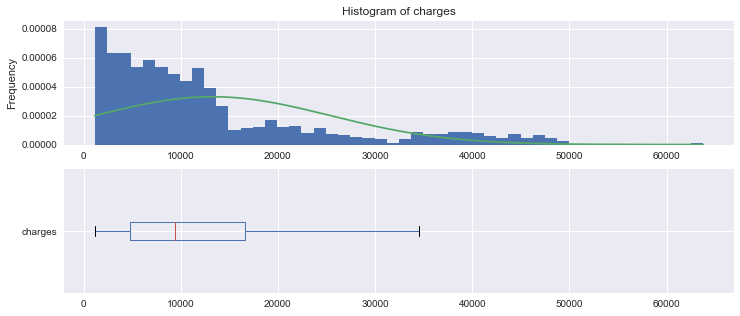

In [8]:
plt.subplot(211)
y.plot.hist(bins = 50, density = True)
plt.title("Histogram of charges")

x_vals, y_vals = gaussian(y)
plt.plot(x_vals, y_vals)


plt.subplot(212)
y.plot.box(vert=False)

In [9]:
y = np.log(df[target])

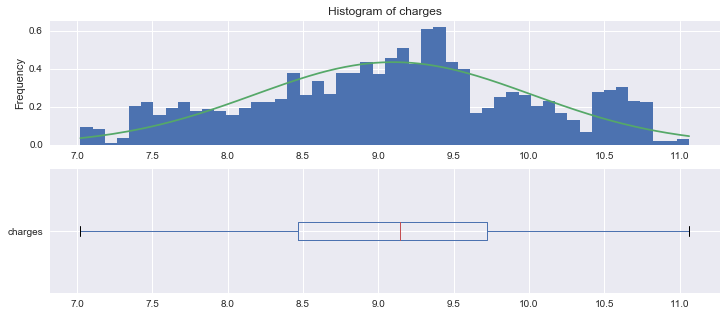

In [10]:
plt.subplot(211)
y.plot.hist(bins = 50, density = True)
plt.title("Histogram of charges")

x_vals, y_vals = gaussian(y)
plt.plot(x_vals, y_vals)


plt.subplot(212)
y.plot.box(vert=False)

In [11]:
X = df.drop(columns=[target])

In [12]:
cat_columns = [k for k in dict(X.dtypes) if str(X.dtypes[k]) == "object"]
num_columns = [k for k in dict(X.dtypes) if str(X.dtypes[k]) != "object"]
print("categorical columns:", cat_columns)
print("continuous columns:", num_columns)

categorical columns: ['gender', 'smoker', 'region']
continuous columns: ['age', 'bmi', 'children']


In [13]:
X[num_columns].dtypes

age           int64
bmi         float64
children      int64
dtype: object

In [14]:
X[num_columns] = X[num_columns].astype("float64")
X[num_columns].dtypes

age         float64
bmi         float64
children    float64
dtype: object

In [15]:
cat_pipe = pipeline.make_pipeline(preprocessing.OneHotEncoder(handle_unknown = "ignore"))

num_pipe = pipeline.make_pipeline(
    preprocessing.StandardScaler()
)

column_transformers = compose.ColumnTransformer([
    ("cat", cat_pipe, cat_columns),
    ("num", num_pipe, num_columns),
    ("bucketizers", preprocessing.KBinsDiscretizer(n_bins = 5), ["age", "bmi"])
])

column_transformers

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True))]), ['gender', 'smoker', 'region']), ('num', Pipeline(memory=None,
   ..., ('bucketizers', KBinsDiscretizer(encode='onehot', n_bins=5, strategy='quantile'), ['age', 'bmi'])])

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                        , test_size = 0.3, random_state = 1)

In [17]:
pipe = pipeline.Pipeline([
    ("column_transformers", column_transformers),
    ("lr", linear_model.LinearRegression())
])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7883913140398686